In [1]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp


In [2]:
from numpy import sign 
from decimal import *
getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [3]:
#MI DNI : 45338112Y
S= 4+5+3+3+8+1+1+2
print(S)

27


In [4]:
M= S/8
print(M)

3.375


In [5]:
x = sp.Symbol('x')

In [6]:
def fnum(x):
    return x**3+M*x+S

In [7]:
def fsym(x):
    return x**3+M*x+S

In [8]:
def f(x):
    return fsym(x)

In [9]:
a= -10; b=10;

In [10]:
f(a), f(b)

(-1006.75, 1060.75)

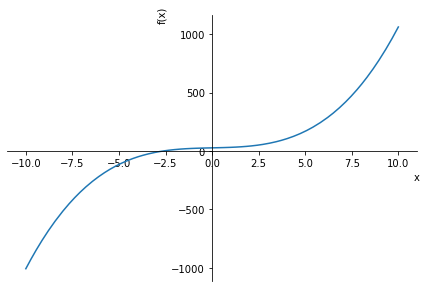

In [11]:
sp.plot(f(x),(x,a,b))

Claramente la raíz de nuestra función en cuestión está comprendida entre el intervalo [-10,10]. 

In [12]:
a=-3; b=-2

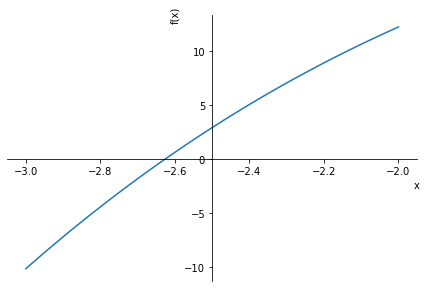

In [13]:
sp.plot(f(x),(x,a,b))

Claramente la raíz esta situada ahora en un intervalo de longitud 1, [-3,-2] Realicemos ahora el método de bisección con una tolerancia de 1 décima (tol = 10^-1) y asumiremos como precisión 10^-5  y como cifras significativas para el redondeo final 5. Mostraremos las iteraciones necesarias para conseguir la raíz que respete los parámetros de control antes mencionados en el intervalo propuesto.

In [14]:
def biseccion(f, a,b, prec=10**-5, tol=10*-1, maxiteraciones = 100, cifras = 5):
    # Ahora con la precisión asociada al nº de cifras solicitadas
    niter = 0; sale =''
    getcontext().prec = cifras
    for k in range(maxiteraciones):
        niter = niter + 1;
        c = a + (b-a)/2 # equivalente a c = (a+b)/2
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ',Decimal(c))
    elif niter < nmax:
        print('Aproximación solicitada: ',c)
    else:
        print('Se llegó al número máximo de iteraciones')
    print('Solución exacta con ', cifras, ' cifras significativas', round(c, cifras))
    print('Número total de iteraciones ', niter)
    resultado = c
    

In [15]:
biseccion(f,-3,-2)

Posiblemente solución exacta:  -2.6271915435791015625
Solución exacta con  5  cifras significativas -2.62719
Número total de iteraciones  19


Ahora emplemos 10 iteraciones más, partiendo de la aproximación anterior con el algoritmo Newton-Raphson

In [16]:
f(x),sp.diff(f(x),x)

(x**3 + 3.375*x + 27, 3*x**2 + 3.375)

In [17]:
def df(x):
    return 3*x**2 + 3.375

In [18]:
x0= -2.6271915435791015625

In [19]:
niter = 0;
m =df(x0);  # pendiente inicial

for k in range(10):
    niter = niter + 1;
    x1 = x0 - f(x0)/m  # método de Whitaker
    # Cambiar m por Decimal(df(x0)) para variar en cada iteración la pendiente (Método Newton-Raphson)
    m=df(x1);

print("Resultado después de 10 iteraciones con el método Newton-Raphson",x1)

Resultado después de 10 iteraciones con el método Newton-Raphson -2.627191409343675


Comparemos los resultados obtenido con la solución exacta mediante la orden solve a la que le pasaremos como parámetros la función evaluada, y le pediremos que nos muestre nuestra raíz en concreto que estamos estudiando y no el resto.

In [20]:
from sympy.solvers import solve

In [21]:
solve(x**3+M*x+S,x)[0]

-2.62719140934368

In [22]:
print("Diferencia con método de bisección:", abs(-2.6271915435791015625 - -2.62719140934368))

Diferencia con método de bisección: 1.342354214450836e-07


In [23]:
print("Diferencia con método de Newton-Raphson:", abs(-2.62719140934368 - -2.627191409343675))

Diferencia con método de Newton-Raphson: 5.329070518200751e-15


Finalmente podemos observar que mediante las 10 iteraciones extra del método Newton-Raphson aproximamos mejor la raíz que buscábamos